## Dataset EDA

In [2]:
import pandas as pd

# Import dataset
file_path = '../../dataset/raw/RAW_recipes.csv'
recipes_data = pd.read_csv(file_path)

recipes_data.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [3]:
# Basic info

print(recipes_data.info())

print(recipes_data.describe())

print(type(recipes_data['nutrition'][0]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            231636 non-null  object
 1   id              231637 non-null  int64 
 2   minutes         231637 non-null  int64 
 3   contributor_id  231637 non-null  int64 
 4   submitted       231637 non-null  object
 5   tags            231637 non-null  object
 6   nutrition       231637 non-null  object
 7   n_steps         231637 non-null  int64 
 8   steps           231637 non-null  object
 9   description     226658 non-null  object
 10  ingredients     231637 non-null  object
 11  n_ingredients   231637 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 21.2+ MB
None
                  id       minutes  contributor_id        n_steps  \
count  231637.000000  2.316370e+05    2.316370e+05  231637.000000   
mean   222014.708984  9.398546e+03    5.534885e+06       9.765499

In [4]:
# Convert submitted to time format
recipes_data['submitted'] = pd.to_datetime(recipes_data['submitted'])

import ast

# Convert nutrition to list
recipes_data['nutrition'] = recipes_data['nutrition'].apply(ast.literal_eval)

print(recipes_data[['submitted', 'nutrition']].head())

# Check type of other elements
print(type(recipes_data['tags'][0]))
print(type(recipes_data['steps'][0]))
print(type(recipes_data['ingredients'][0]))


   submitted                                   nutrition
0 2005-09-16       [51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]
1 2002-06-17   [173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]
2 2005-02-25  [269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]
3 2003-04-14   [368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]
4 2002-10-25   [352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]
<class 'str'>
<class 'str'>
<class 'str'>


In [5]:
# Convert others elements to list

recipes_data['tags'] = recipes_data['tags'].apply(ast.literal_eval)
recipes_data['steps'] = recipes_data['steps'].apply(ast.literal_eval)
recipes_data['ingredients'] = recipes_data['ingredients'].apply(ast.literal_eval)

print(recipes_data[['tags', 'steps', 'ingredients']].head())

                                                tags  \
0  [60-minutes-or-less, time-to-make, course, mai...   
1  [30-minutes-or-less, time-to-make, course, mai...   
2  [time-to-make, course, preparation, main-dish,...   
3  [60-minutes-or-less, time-to-make, course, mai...   
4  [weeknight, time-to-make, course, main-ingredi...   

                                               steps  \
0  [make a choice and proceed with recipe, depend...   
1  [preheat oven to 425 degrees f, press dough in...   
2  [brown ground beef in large pot, add chopped o...   
3  [place potatoes in a large pot of lightly salt...   
4  [mix all ingredients& boil for 2 1 / 2 hours ,...   

                                         ingredients  
0  [winter squash, mexican seasoning, mixed spice...  
1  [prepared pizza crust, sausage patty, eggs, mi...  
2  [ground beef, yellow onions, diced tomatoes, t...  
3  [spreadable cheese with garlic and herbs, new ...  
4  [tomato juice, apple cider vinegar, sugar, sal..

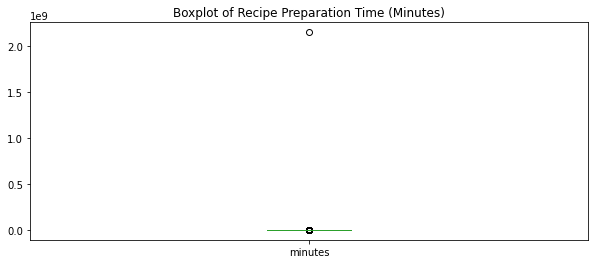

In [6]:
import matplotlib.pyplot as plt

# Check abnormal value of minutes

plt.figure(figsize=(10, 4))
recipes_data['minutes'].plot(kind='box')
plt.title('Boxplot of Recipe Preparation Time (Minutes)')
plt.show()


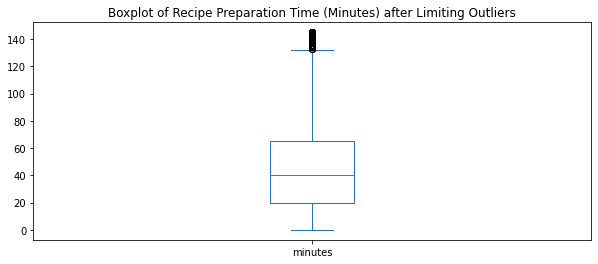

In [7]:
# Cut abnormal minutes
minutes_percentile = recipes_data['minutes'].quantile(0.91)

recipes_data.loc[recipes_data['minutes'] > minutes_percentile, 'minutes'] = minutes_percentile

plt.figure(figsize=(10, 4))
recipes_data['minutes'].plot(kind='box')
plt.title('Boxplot of Recipe Preparation Time (Minutes) after Limiting Outliers')
plt.show()

In [8]:
# Delete null value from name
recipes_data = recipes_data.dropna(subset=['name'])

print(recipes_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231636 entries, 0 to 231636
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   name            231636 non-null  object        
 1   id              231636 non-null  int64         
 2   minutes         231636 non-null  int64         
 3   contributor_id  231636 non-null  int64         
 4   submitted       231636 non-null  datetime64[ns]
 5   tags            231636 non-null  object        
 6   nutrition       231636 non-null  object        
 7   n_steps         231636 non-null  int64         
 8   steps           231636 non-null  object        
 9   description     226657 non-null  object        
 10  ingredients     231636 non-null  object        
 11  n_ingredients   231636 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 23.0+ MB
None


In [9]:
# Split nutrition into separate columns
nutrition_df = recipes_data['nutrition'].apply(pd.Series)
nutrition_df.columns = ['calories', 'total_fat', 'sugar', 'sodium', 'protein', 'saturated_fat', 'carbohydrates']

recipes_data = pd.concat([recipes_data, nutrition_df], axis=1)
recipes_data = recipes_data.drop('nutrition', axis=1)
recipes_data.head()

,name,id,minutes,contributor_id,submitted,tags,n_steps,steps,description,ingredients,n_ingredients,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"[60-minutes-or-less, time-to-make, course, mai...",11,"[make a choice and proceed with recipe, depend...",autumn is my favorite time of year to cook! th...,"[winter squash, mexican seasoning, mixed spice...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"[30-minutes-or-less, time-to-make, course, mai...",9,"[preheat oven to 425 degrees f, press dough in...",this recipe calls for the crust to be prebaked...,"[prepared pizza crust, sausage patty, eggs, mi...",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0
2,all in the kitchen chili,112140,130,196586,2005-02-25,"[time-to-make, course, preparation, main-dish,...",6,"[brown ground beef in large pot, add chopped o...",this modified version of 'mom's' chili was a h...,"[ground beef, yellow onions, diced tomatoes, t...",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0
3,alouette potatoes,59389,45,68585,2003-04-14,"[60-minutes-or-less, time-to-make, course, mai...",11,[place potatoes in a large pot of lightly salt...,"this is a super easy, great tasting, make ahea...","[spreadable cheese with garlic and herbs, new ...",11,368.1,17.0,10.0,2.0,14.0,8.0,20.0
4,amish tomato ketchup for canning,44061,145,41706,2002-10-25,"[weeknight, time-to-make, course, main-ingredi...",5,"[mix all ingredients& boil for 2 1 / 2 hours ,...",my dh's amish mother raised him on this recipe...,"[tomato juice, apple cider vinegar, sugar, sal...",8,352.9,1.0,337.0,23.0,3.0,0.0,28.0


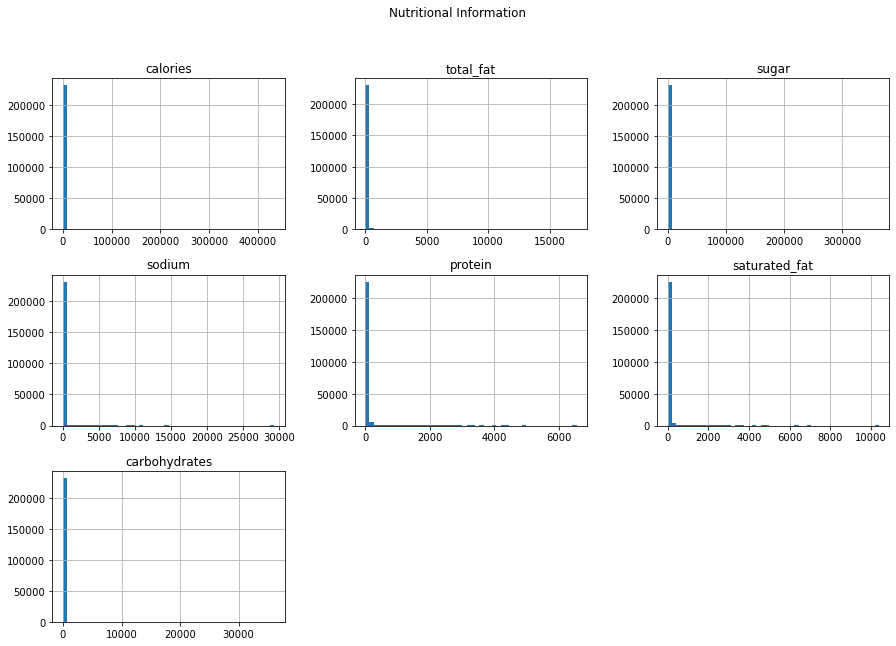

In [10]:
# Check distribution of nutritions
nutrition_columns = ['calories', 'total_fat', 'sugar', 'sodium', 'protein', 'saturated_fat', 'carbohydrates']
recipes_data[nutrition_columns].hist(bins=50, figsize=(15, 10))
plt.suptitle('Nutritional Information')
plt.show()

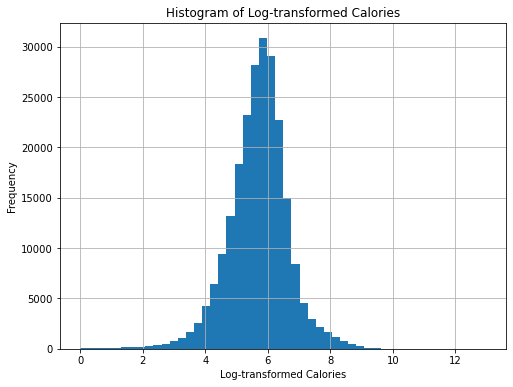

In [11]:
import numpy as np

# Log transform
recipes_data['calories_log'] = np.log(recipes_data['calories'] + 1)

plt.figure(figsize=(8, 6))
recipes_data['calories_log'].hist(bins=50)
plt.title('Histogram of Log-transformed Calories')
plt.xlabel('Log-transformed Calories')
plt.ylabel('Frequency')
plt.show()


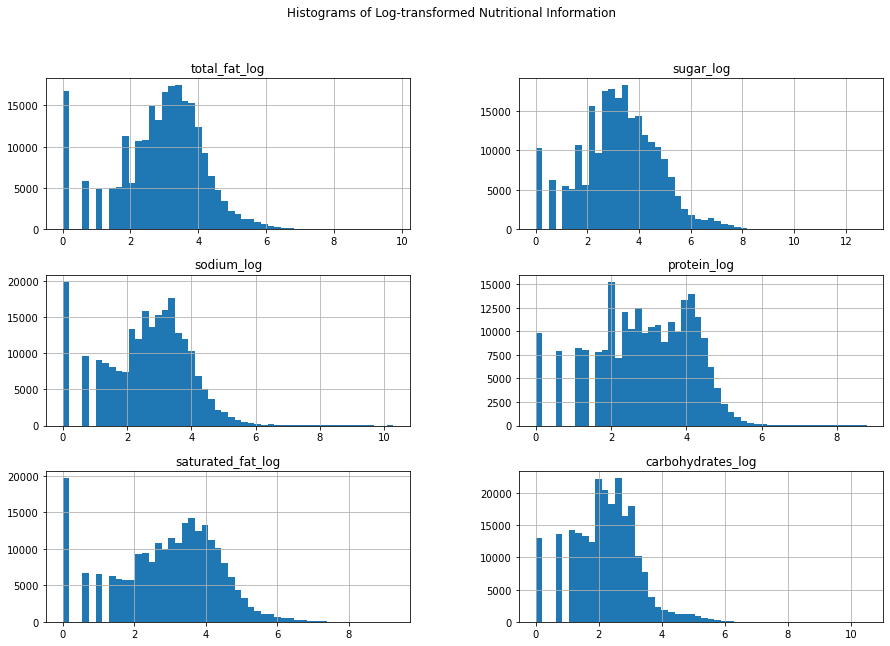

In [12]:
# Log transformation on other nutritional columns
for col in ['total_fat', 'sugar', 'sodium', 'protein', 'saturated_fat', 'carbohydrates']:
    recipes_data[f'{col}_log'] = np.log(recipes_data[col] + 1)

log_nutrition_columns = ['total_fat_log', 'sugar_log', 'sodium_log', 'protein_log', 'saturated_fat_log', 'carbohydrates_log']
recipes_data[log_nutrition_columns].hist(bins=50, figsize=(15, 10))
plt.suptitle('Histograms of Log-transformed Nutritional Information')
plt.show()

In [13]:
print(recipes_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231636 entries, 0 to 231636
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   name               231636 non-null  object        
 1   id                 231636 non-null  int64         
 2   minutes            231636 non-null  int64         
 3   contributor_id     231636 non-null  int64         
 4   submitted          231636 non-null  datetime64[ns]
 5   tags               231636 non-null  object        
 6   n_steps            231636 non-null  int64         
 7   steps              231636 non-null  object        
 8   description        226657 non-null  object        
 9   ingredients        231636 non-null  object        
 10  n_ingredients      231636 non-null  int64         
 11  calories           231636 non-null  float64       
 12  total_fat          231636 non-null  float64       
 13  sugar              231636 non-null  float64 

In [14]:
# Select features and target
features = ['minutes', 'n_steps', 'n_ingredients'] + log_nutrition_columns
target = 'calories_log'

X = recipes_data[features]
y = recipes_data[target]

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Just a baseline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE) on test set: {rmse}')

# On original scale
y_test_exp = np.exp(y_test) - 1
y_pred_exp = np.exp(y_pred) - 1
rmse_exp = np.sqrt(mean_squared_error(y_test_exp, y_pred_exp))
print(f'Root Mean Squared Error (RMSE) on original calorie scale: {rmse_exp}')

Root Mean Squared Error (RMSE) on test set: 0.34265420316316997
Root Mean Squared Error (RMSE) on original calorie scale: 245.32832963348557


In [16]:
from sklearn.model_selection import train_test_split

train_data, temp_test_data = train_test_split(recipes_data, test_size=0.4, random_state=42)

validation_data, test_data = train_test_split(temp_test_data, test_size=0.5, random_state=42)

train_data_path = '../../dataset/processed/train_data.csv'
validation_data_path = '../../dataset/processed/validation_data.csv'
test_data_path = '../../dataset/processed/test_data.csv'

train_data.to_csv(train_data_path, index=False)
validation_data.to_csv(validation_data_path, index=False)
test_data.to_csv(test_data_path, index=False)

[nltk_data] Downloading package stopwords to /home/joel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


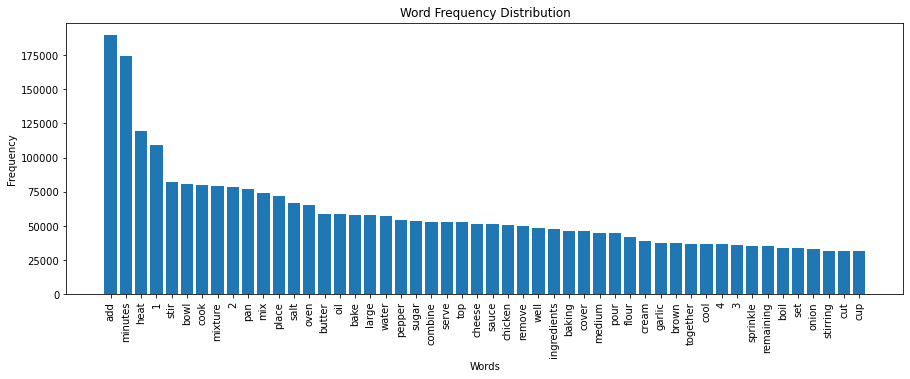

In [5]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

train_data_path = '../../dataset/processed/train_data.csv'

data = pd.read_csv(train_data_path)

word_freq = Counter()

for steps in data['steps']:

    steps_list = eval(steps)
    
    for step in steps_list:
        step_clean = re.sub(r'[^\w\s]', '', step).lower()
        words = step_clean.split()
        words_filtered = [word for word in words if word not in stop_words]
        word_freq.update(words_filtered)

most_common_words = word_freq.most_common(500)
words, counts = zip(*most_common_words)

plt.figure(figsize=(15, 5))
plt.bar(words, counts)
plt.xticks(rotation=90)
plt.title('Word Frequency Distribution')
plt.xlabel('Words')
plt.ylabel('Frequency')

plt.show()
